<a href="https://colab.research.google.com/github/Afqufai/MachineLearning2025_03/blob/main/TG11_2341720083_Afrizal_Qurratul_Faizin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jobsheet 11 - Klasifikasi 2
- Nama: Afrizal Qurratul Faizin
- Kelas: TI-3G/03
- NIM: 2341720083

## Praktikum 1

In [65]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

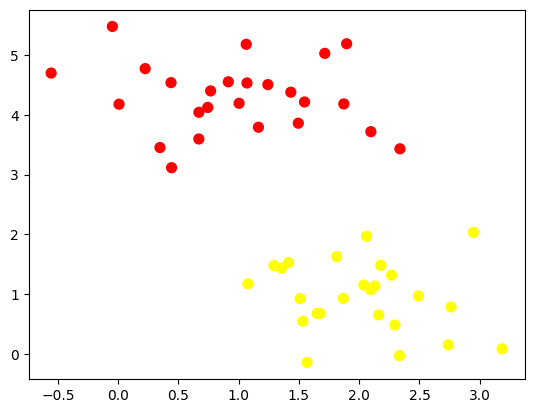

In [66]:
# Data Dummy
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

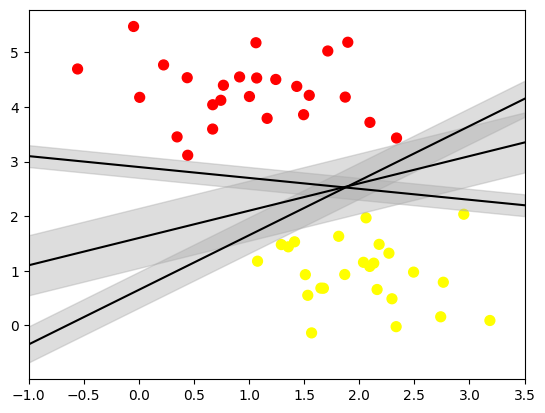

In [67]:
# Ilustrasi Margin
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

In [68]:
# Fitting Model
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [69]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

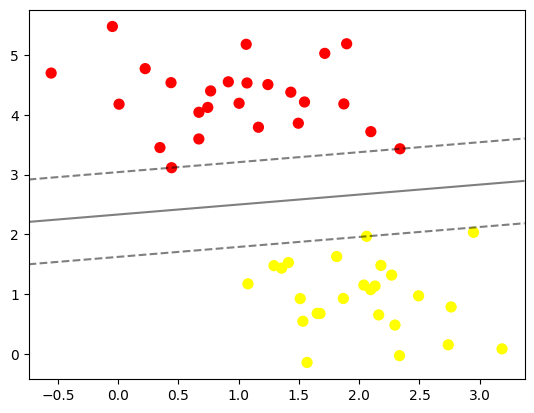

In [70]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [71]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

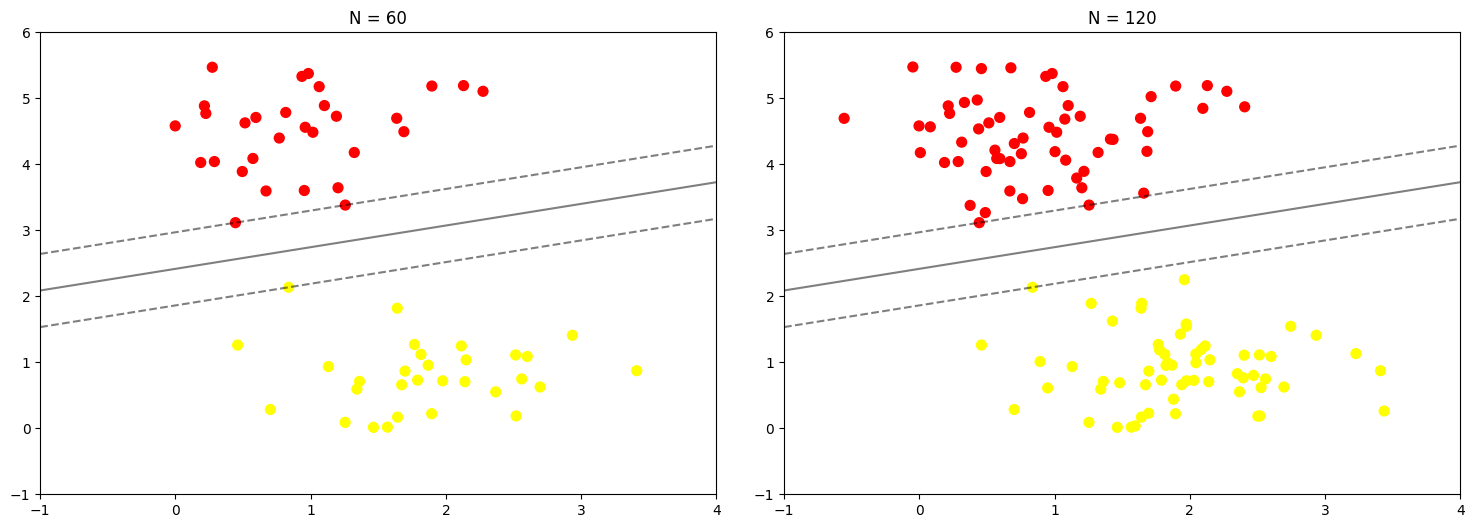

In [72]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [73]:
# jumlah data dapat dipilih di antara 10 atau 200 buah data, telihat tidak ada perubahan pada model
!pip install ipywidgets
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

# Praktikum 2

In [74]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

In [75]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

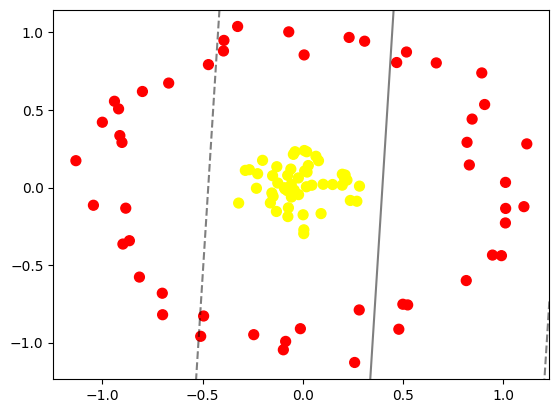

In [76]:
# contoh data tidak terpisah secara linier / data dummy non-linear
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
r = np.exp(-(X ** 2).sum(1))

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [77]:
# Visualisasi 3D
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-4.33669714e-02, -1.70933585e-02],
       [ 6.65111625e-01,  8.03307191e-01],
       [ 1.00884760e-01,  2.07759437e-02],
       [ 8.18549346e-01,  2.91395932e-01],
       [-3.96293926e-01,  8.80274745e-01],
       [-2.28853587e-02,  6.16353061e-02],
       [ 1.87109445e-02,  2.30585264e-01],
       [-1.62465497e-01, -9.93594572e-02],
       [-2.17947863e-02, -4.59196031e-02],
       [-3.20678399e-01, -1.00232963e-01],
       [ 1.01119238e+00, -1.34829597e-01],
       [-9.77453929e-02, -1.04626509e+00],
       [-9.02706584e-01,  2.90643689e-01],
       [ 4.78323843e-01, -9.13722397e-01],
       [ 1.96323118e-01,  8.55664044e-02],
       [-9.19577544e-01,  5.07135283e-01],
       [ 2.82134795e-01,  8.84016577e-03],
       [ 4.98328284e-01, -7.52566616e-01],
       [-8.99022394e-02, -9.48514300e-03],
       [-9.24112380e-02, -1.34564660e-03],
       [-1.30340557e-01,  1.34167440e-01],
       [ 2.68030407e-02,  1.41684492e-01],
       [ 8.14652794e-01, -5.99906034e-01],
       [-4.95453694e-01, -8.28491591e-01],
       [-8.65678071e-01, -3.42863454e-01],
       [ 8.92109563e-01,  7.38772570e-01],
       [-1.54999220e-01, -3.53866012e-02],
       [ 2.30368259e-01,  9.67571897e-01],
       [-1.32356760e-01, -1.54456730e-01],
       [-3.94098051e-01,  9.48445679e-01],
       [-2.87326233e-01,  1.10444328e-01],
       [-1.48797948e-01, -5.69758391e-02],
       [-6.03856824e-02,  1.18770055e-01],
       [ 3.07707653e-01,  9.43309816e-01],
       [ 2.57907706e-01, -1.12806311e+00],
       [-9.13267494e-01,  3.34870037e-01],
       [-1.00053274e+00,  4.20907201e-01],
       [ 4.07329059e-03, -2.97398498e-01],
       [-1.13251629e+00,  1.73000212e-01],
       [-2.31973885e-01, -4.86768585e-03],
       [-4.71371659e-01,  7.92453803e-01],
       [ 2.19584829e-01,  4.80160170e-02],
       [-9.40153070e-01,  5.56070715e-01],
       [-8.15515389e-01, -5.77506491e-01],
       [ 9.90173162e-01, -4.39324027e-01],
       [ 5.96983389e-03,  8.54830120e-01],
       [-1.04509109e+00, -1.14382067e-01],
       [ 9.45509164e-01, -4.35602770e-01],
       [ 8.43962891e-01,  4.41215765e-01],
       [ 6.48094837e-02,  2.01471287e-01],
       [ 9.06378998e-01,  5.35153404e-01],
       [ 2.68996629e-01, -8.84207051e-02],
       [ 5.16472055e-01,  8.73647041e-01],
       [-7.24628120e-02, -1.30798806e-01],
       [ 1.47900314e-01,  1.93443019e-02],
       [-6.69617314e-01,  6.73421034e-01],
       [ 8.30014484e-01,  1.45420044e-01],
       [ 2.08066244e-01,  5.75050705e-02],
       [-4.77449297e-02,  2.13755109e-01],
       [ 1.95922499e-01,  1.52031881e-02],
       [ 1.01001426e+00, -2.28502498e-01],
       [-3.96156802e-02,  2.30756219e-01],
       [-7.00003120e-01, -8.20169494e-01],
       [-3.25731752e-01,  1.03827040e+00],
       [ 8.96634267e-04, -1.75797853e-01],
       [ 9.04173413e-02, -1.68154036e-01],
       [ 8.67855591e-03,  1.06865015e-01],
       [-7.07015087e-02,  1.00355222e+00],
       [ 4.67640774e-01,  8.05813800e-01],
       [ 5.22419112e-01, -7.56970848e-01],
       [ 1.11666312e+00,  2.81369640e-01],
       [-2.67176119e-01,  1.14831890e-01],
       [ 2.36422032e-01, -8.34464037e-02],
       [ 2.05311012e-02,  9.95999223e-02],
       [ 1.01054103e+00,  3.30549544e-02],
       [ 7.02579340e-03,  2.38530847e-01],
       [-2.25908042e-01,  8.90293848e-02],
       [-2.45398919e-01, -9.48804617e-01],
       [-8.00647127e-01,  6.19057223e-01],
       [ 1.73369412e-02,  4.74641246e-03],
       [-7.72340237e-02, -2.06093106e-02],
       [ 1.10230097e+00, -1.23459256e-01],
       [-8.83767862e-01, -1.33215859e-01],
       [-5.09992979e-01, -9.59320883e-01],
       [-5.82152665e-02,  1.95412808e-02],
       [-5.75355001e-02, -6.15417099e-02],
       [-7.60678596e-02,  7.84875745e-02],
       [ 4.53887740e-03, -2.72734895e-01],
       [ 4.42833671e-02,  1.47702917e-02],
       [-2.01394868e-01,  1.75180868e-01],
       [-7.50788356e-02, -1.87397236e-01],
       [ 2.10477263e-01,  8.06115431e-02

In [78]:
# Fitting Model
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

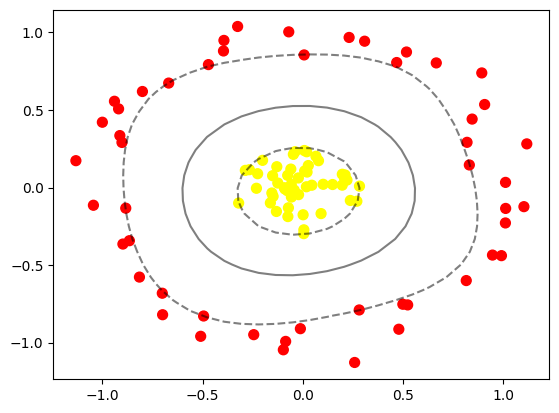

In [79]:
# Plot
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

# Praktikum 3

In [80]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [81]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

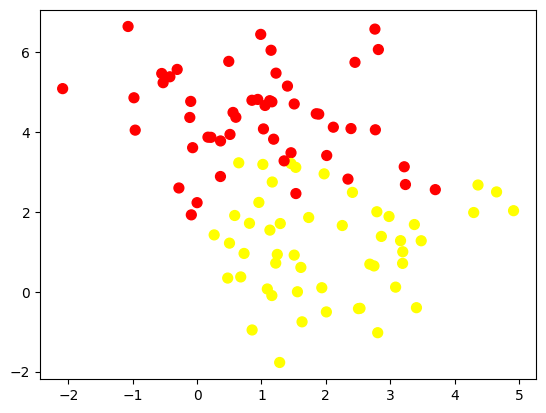

In [82]:
# Buat dat
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# Praktikum 4

In [83]:
# Ambil Dataset
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


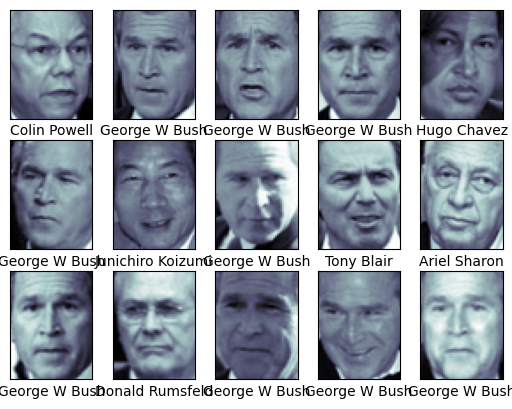

In [84]:
# Inspect
# contoh wajah yang digunakan
from matplotlib import pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [85]:
# Preprocess
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')

# Pipeline digunakan untuk melakukan proses secara bertahap dalam
# 1 eksekusi fungsi secara langsung
model = make_pipeline(pca, svc)

In [86]:
# SSSplit
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [87]:
# Pembuatan Model dan Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 2min 20s, sys: 553 ms, total: 2min 20s
Wall time: 1min 52s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


In [88]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

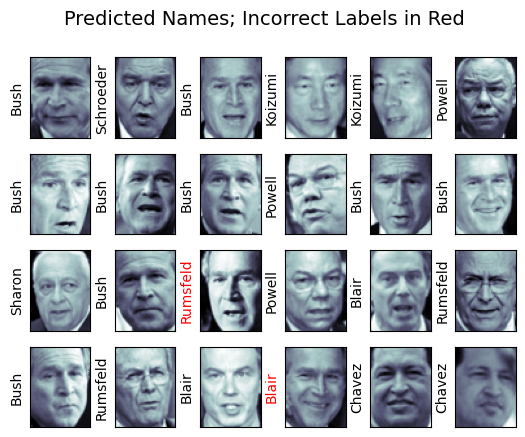

In [89]:
# Cek hasil prediksi
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [90]:
# Cek performansi
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

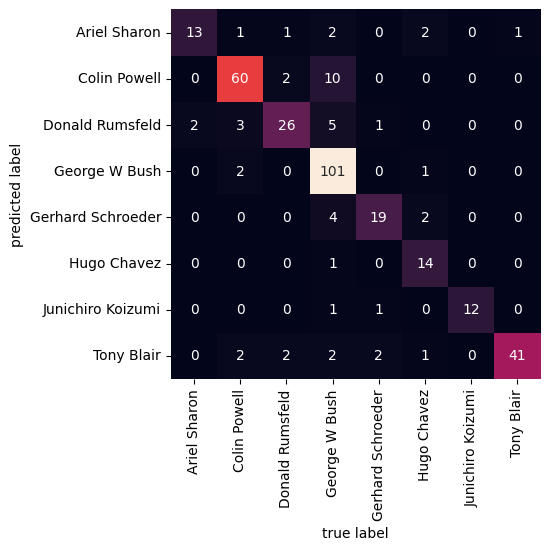

In [91]:
# bentuk confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Praktikum 5

In [92]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
# Image directories
train_dir = "/content/drive/MyDrive/Dataset/MLImage/training/"
test_dir = "/content/drive/MyDrive/Dataset/MLImage/test/"

In [94]:
# Load Data dan Visualisasi
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [95]:
# Load training data
train_img = load_dataset(train_dir)

In [96]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[ 54,  36,  26],
         [ 54,  36,  26],
         [ 54,  36,  26],
         ...,
         [ 62,  43,  29],
         [ 62,  43,  29],
         [ 62,  43,  29]],
 
        [[ 54,  36,  26],
         [ 54,  36,  26],
         [ 54,  36,  26],
         ...,
         [ 62,  43,  29],
         [ 62,  43,  29],
         [ 62,  43,  29]],
 
        [[ 54,  36,  26],
         [ 54,  36,  26],
         [ 54,  36,  26],
         ...,
         [ 62,  43,  29],
         [ 62,  43,  29],
         [ 62,  43,  29]],
 
        ...,
 
        [[179, 114,  60],
         [151,  93,  43],
         [141,  94,  52],
         ...,
         [115,  62,  22],
         [115,  62,  22],
         [115,  62,  22]],
 
        [[147,  87,  37],
         [193, 141,  94],
         [151, 109,  71],
         ...,
         [115,  62,  22],
         [115,  62,  22],
         [115,  62,  22]],
 
        [[174, 118,  71],
         [253, 202, 159],
         [221, 183, 147],
         ...,
         [115,  62,  22],
  

In [97]:
# Random size checking
if len(train_img) > 0:
    pick_random = np.random.randint(0, len(train_img))

    # Check img size
    print(f'Image {pick_random}')
    print(train_img[pick_random][0].shape)
else:
    print("No training images found in train_img list. Please ensure 'images/training/' contains images.")

Image 188
(372, 640, 3)


In [98]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (372, 640, 3)
Label	: day


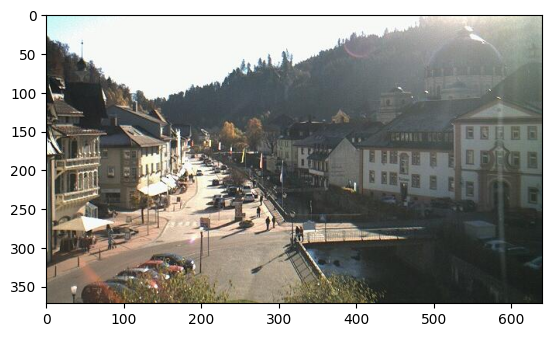

In [99]:
random_img_viz(train_img)

In [100]:
# Preprocessing
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

In [101]:
train_std_img_list = preprocess(train_img)

In [102]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 148
(600, 1100, 3)


In [103]:
# Ekstraksi Fitur
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Image 16
Avg Brighness: 29.4253


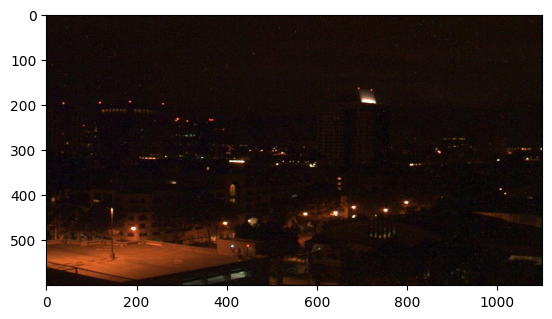

In [104]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

In [105]:
# Klasifikasi dengan Metode Threshold
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Image 78
Actual label: 0
Predicted label: 0


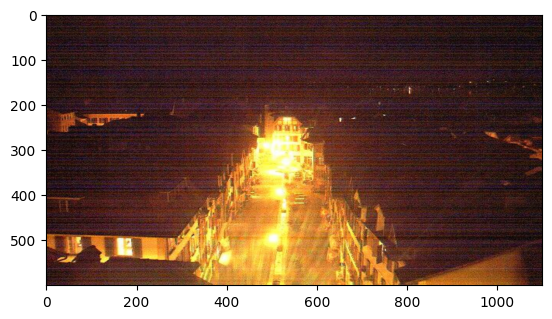

In [106]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

In [107]:
# Evaluasi Manual
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

In [108]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


In [109]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


In [110]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

In [111]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,109.456177,0.0
1,27.900359,0.0
2,85.889741,0.0
3,25.731924,0.0
4,99.081226,0.0


In [112]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,130.929544,1.0
1,116.048989,1.0
2,161.989627,1.0
3,133.870114,1.0
4,104.136732,1.0


# Tugas
- Buatlah model SVM dengan menggunakan data voice.csv dengan ketentuan,

    - Split data dengan rasio 70:30 dan 80:20 untuk setiap model yang akan dibangun.

    - Gunakan model dengan kernel linier.

    - Gunakan model dengan kernel polynomial.

    - Gunakan model dengan kernel RBF.

    - Tabulasikan performansi setiap split dan kernel berdasarkan metrik akurasi.

- Gunakan data pada praktikum 5 untuk membuat model klasifikasi siang dan malam menggunakan SVM dengan kernel RBF menggunakan fitur histrogram. Gunakan rasio 80:20. Anda dapat bereksperimen dengan hyperparameter tunning dari kernel RBF. Catat performansi akurasinya!

In [113]:
# IMPORT ALL THE THINGS
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
# Read EVERYTHING
df = pd.read_csv('/content/drive/MyDrive/Dataset/voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [115]:
# Preprocessing the 'label' column
from sklearn.preprocessing import LabelEncoder

# Separate features (X) and target (y)
X = df.drop('label', axis=1)
y = df['label']

# Encode the target variable
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

print("Original labels:", y.unique())
print("Encoded labels:", y_encoded)
print("X shape:", X.shape)
print("y_encoded shape:", y_encoded.shape)

Original labels: ['male' 'female']
Encoded labels: [1 1 1 ... 0 0 0]
X shape: (3168, 20)
y_encoded shape: (3168,)


In [116]:
# Import necessary modules for model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

def train_evaluate_svm(X, y, test_size, kernel_type):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    # Initialize SVM model with specified kernel
    if kernel_type == 'linear':
        model = SVC(kernel='linear', random_state=42)
    elif kernel_type == 'poly':
        model = SVC(kernel='poly', random_state=42)
    elif kernel_type == 'rbf':
        model = SVC(kernel='rbf', random_state=42)
    else:
        raise ValueError("Invalid kernel type specified")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


# Store results
results = []

# Define split ratios and kernel types
split_ratios = [0.3, 0.2] # Corresponds to 70:30 and 80:20 train:test
kernel_types = ['linear', 'poly', 'rbf']

for split_ratio in split_ratios:
    for kernel in kernel_types:
        accuracy = train_evaluate_svm(X, y_encoded, split_ratio, kernel)
        results.append({
            'Split Ratio': f'{int((1-split_ratio)*100)}:{int(split_ratio*100)}',
            'Kernel': kernel,
            'Accuracy': accuracy
        })

# Display results in a table
results_df = pd.DataFrame(results)
print(results_df)


  Split Ratio  Kernel  Accuracy
0       70:30  linear  0.920084
1       70:30    poly  0.511041
2       70:30     rbf  0.695058
3       80:20  linear  0.917981
4       80:20    poly  0.517350
5       80:20     rbf  0.694006


In [117]:
# Preprocessing the 'label' column
from sklearn.preprocessing import LabelEncoder

# Separate features (X) and target (y)
X = df.drop('label', axis=1)
y = df['label']

# Encode the target variable
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

print("Original labels:", y.unique())
print("Encoded labels:", y_encoded)
print("X shape:", X.shape)
print("y_encoded shape:", y_encoded.shape)

Original labels: ['male' 'female']
Encoded labels: [1 1 1 ... 0 0 0]
X shape: (3168, 20)
y_encoded shape: (3168,)


In [118]:
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd

# Combine all standardized images and labels for consistent splitting
# Assuming train_std_img_list and test_std_img_list are populated from previous Praktikum 5 cells
all_std_images_labels = train_std_img_list + test_std_img_list

# Function to extract histogram features (RGB channels)
def extract_histogram_features(image, bins=32):
    hist_r = cv2.calcHist([image], [0], None, [bins], [0, 256]).flatten()
    hist_g = cv2.calcHist([image], [1], None, [bins], [0, 256]).flatten()
    hist_b = cv2.calcHist([image], [2], None, [bins], [0, 256]).flatten()
    # Concatenate the histograms
    features = np.concatenate((hist_r, hist_g, hist_b))
    return features

# Prepare data for SVM
X_hist_features = []
y_hist_labels = []

for img_array, label in all_std_images_labels:
    features = extract_histogram_features(img_array)
    X_hist_features.append(features)
    y_hist_labels.append(label)

X_hist = np.array(X_hist_features)
y_hist = np.array(y_hist_labels)

print(f"Shape of X_hist (features): {X_hist.shape}")
print(f"Shape of y_hist (labels): {y_hist.shape}")

# Split data with 80:20 ratio
X_train_hist, X_test_hist, y_train_hist, y_test_hist = train_test_split(
    X_hist, y_hist, test_size=0.2, random_state=42, stratify=y_hist
)

print(f"Shape of X_train_hist: {X_train_hist.shape}")
print(f"Shape of X_test_hist: {X_test_hist.shape}")

# SVM Model with RBF kernel and Hyperparameter Tuning
# Define the SVM model
svm_rbf = SVC(kernel='rbf', random_state=42)

# Define the parameter grid for GridSearchCV for C and gamma
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1]
}

# Create GridSearchCV object
grid_search = GridSearchCV(svm_rbf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the grid search to the training data
# This might take a few minutes depending on the dataset size and parameters
%time grid_search.fit(X_train_hist, y_train_hist)

# Get the best parameters and best cross-validation score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"\nBest parameters found: {best_params}")
print(f"Best cross-validation accuracy: {best_score:.4f}")

# Evaluate the best model on the test set
best_svm_model = grid_search.best_estimator_
y_pred_hist = best_svm_model.predict(X_test_hist)
test_accuracy = accuracy_score(y_test_hist, y_pred_hist)

print(f"Test accuracy of the best RBF SVM model: {test_accuracy:.4f}")

Shape of X_hist (features): (400, 96)
Shape of y_hist (labels): (400,)
Shape of X_train_hist: (320, 96)
Shape of X_test_hist: (80, 96)
Fitting 5 folds for each of 16 candidates, totalling 80 fits
CPU times: user 85.6 ms, sys: 5.16 ms, total: 90.8 ms
Wall time: 721 ms

Best parameters found: {'C': 0.1, 'gamma': 0.001}
Best cross-validation accuracy: 0.5000
Test accuracy of the best RBF SVM model: 0.5000


In [119]:
# Import necessary modules for model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

def train_evaluate_svm(X, y, test_size, kernel_type):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    # Initialize SVM model with specified kernel
    if kernel_type == 'linear':
        model = SVC(kernel='linear', random_state=42)
    elif kernel_type == 'poly':
        model = SVC(kernel='poly', random_state=42)
    elif kernel_type == 'rbf':
        model = SVC(kernel='rbf', random_state=42)
    else:
        raise ValueError("Invalid kernel type specified")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


# Store results
results = []

# Define split ratios and kernel types
split_ratios = [0.3, 0.2] # Corresponds to 70:30 and 80:20 train:test
kernel_types = ['linear', 'poly', 'rbf']

for split_ratio in split_ratios:
    for kernel in kernel_types:
        accuracy = train_evaluate_svm(X, y_encoded, split_ratio, kernel)
        results.append({
            'Split Ratio': f'{int((1-split_ratio)*100)}:{int(split_ratio*100)}',
            'Kernel': kernel,
            'Accuracy': accuracy
        })

# Display results in a table
results_df = pd.DataFrame(results)
print(results_df)

  Split Ratio  Kernel  Accuracy
0       70:30  linear  0.920084
1       70:30    poly  0.511041
2       70:30     rbf  0.695058
3       80:20  linear  0.917981
4       80:20    poly  0.517350
5       80:20     rbf  0.694006


## Tugas Nomor 2
Gunakan data pada praktikum 5 untuk membuat model klasifikasi siang dan malam menggunakan SVM dengan kernel RBF menggunakan fitur histrogram. Gunakan rasio 80:20. Anda dapat bereksperimen dengan hyperparameter tunning dari kernel RBF. Catat performansi akurasinya!

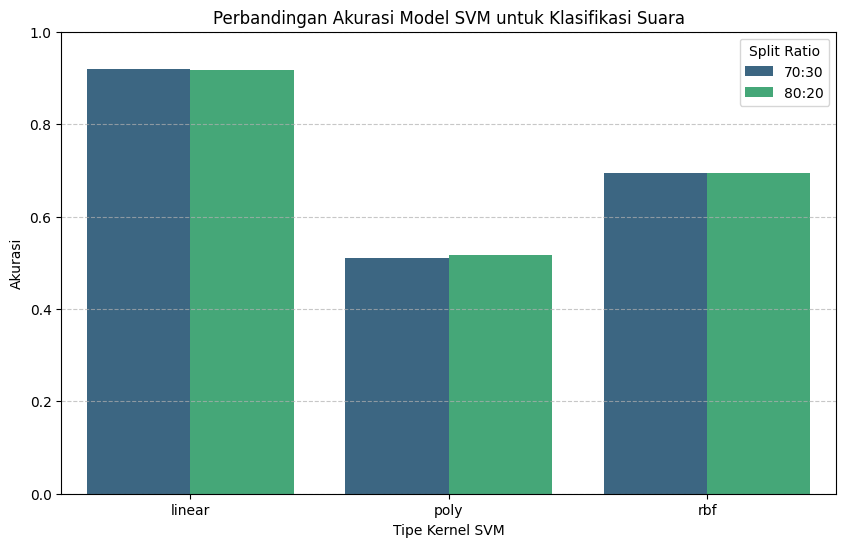

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming results_df from the previous task is available
# If not, run the cell that generates results_df again.

plt.figure(figsize=(10, 6))
sns.barplot(x='Kernel', y='Accuracy', hue='Split Ratio', data=results_df, palette='viridis')
plt.title('Perbandingan Akurasi Model SVM untuk Klasifikasi Suara')
plt.xlabel('Tipe Kernel SVM')
plt.ylabel('Akurasi')
plt.ylim(0, 1) # Accuracy ranges from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Dari grafik di atas, kita dapat melihat perbandingan akurasi model SVM dengan berbagai tipe kernel (Linear, Poly, RBF) dan rasio split data (70:30 dan 80:20). Model dengan kernel Linear menunjukkan akurasi tertinggi, sedangkan kernel Polynomial memiliki akurasi terendah untuk dataset ini.

## Bagian Tugas 2

In [121]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
# Image directories
train_dir = "/content/drive/MyDrive/Dataset/MLImage/training/"
test_dir = "/content/drive/MyDrive/Dataset/MLImage/test/"

In [123]:
import cv2
import numpy as np

# 1. Combine the standardized training and testing image lists
# Assuming train_std_img_list and test_std_img_list are populated from previous Praktikum 5 cells
all_std_images_labels = train_std_img_list + test_std_img_list

# 2. Define a function to extract histogram features (RGB channels)
def extract_histogram_features(image, bins=32):
    hist_r = cv2.calcHist([image], [0], None, [bins], [0, 256]).flatten()
    hist_g = cv2.calcHist([image], [1], None, [bins], [0, 256]).flatten()
    hist_b = cv2.calcHist([image], [2], None, [bins], [0, 256]).flatten()
    # Concatenate the histograms
    features = np.concatenate((hist_r, hist_g, hist_b))
    return features

# 3. Initialize empty lists
X_hist_features = []
y_hist_labels = []

# 4. Iterate through each item, extract features and labels
for img_array, label in all_std_images_labels:
    features = extract_histogram_features(img_array)
    X_hist_features.append(features)
    y_hist_labels.append(label)

# 5. Convert to NumPy arrays and print shapes
X_hist = np.array(X_hist_features)
y_hist = np.array(y_hist_labels)

print(f"Shape of X_hist (features): {X_hist.shape}")
print(f"Shape of y_hist (labels): {y_hist.shape}")

Shape of X_hist (features): (400, 96)
Shape of y_hist (labels): (400,)


In [124]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

# 1 & 2. Split data with 80:20 ratio
X_train_hist, X_test_hist, y_train_hist, y_test_hist = train_test_split(
    X_hist, y_hist, test_size=0.2, random_state=42, stratify=y_hist
)

print(f"Shape of X_train_hist: {X_train_hist.shape}")
print(f"Shape of X_test_hist: {X_test_hist.shape}")

# 3 & 4. Initialize an SVC model with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)

# 5. Define the parameter grid for GridSearchCV for C and gamma
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1]
}

# 6. Create GridSearchCV object
grid_search = GridSearchCV(svm_rbf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# 7. Fit the grid search to the training data
%time grid_search.fit(X_train_hist, y_train_hist)

print(f"\nBest parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

Shape of X_train_hist: (320, 96)
Shape of X_test_hist: (80, 96)
Fitting 5 folds for each of 16 candidates, totalling 80 fits
CPU times: user 90.6 ms, sys: 5.23 ms, total: 95.8 ms
Wall time: 735 ms

Best parameters found: {'C': 0.1, 'gamma': 0.001}
Best cross-validation accuracy: 0.5000


In [125]:
from sklearn.metrics import accuracy_score

# Get the best model from GridSearchCV
best_svm_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_hist = best_svm_model.predict(X_test_hist)

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test_hist, y_pred_hist)

print(f"Test accuracy of the best RBF SVM model: {test_accuracy:.4f}")

Test accuracy of the best RBF SVM model: 0.5000


### Visualisasi Rata-rata Fitur Histogram untuk Gambar Siang dan Malam

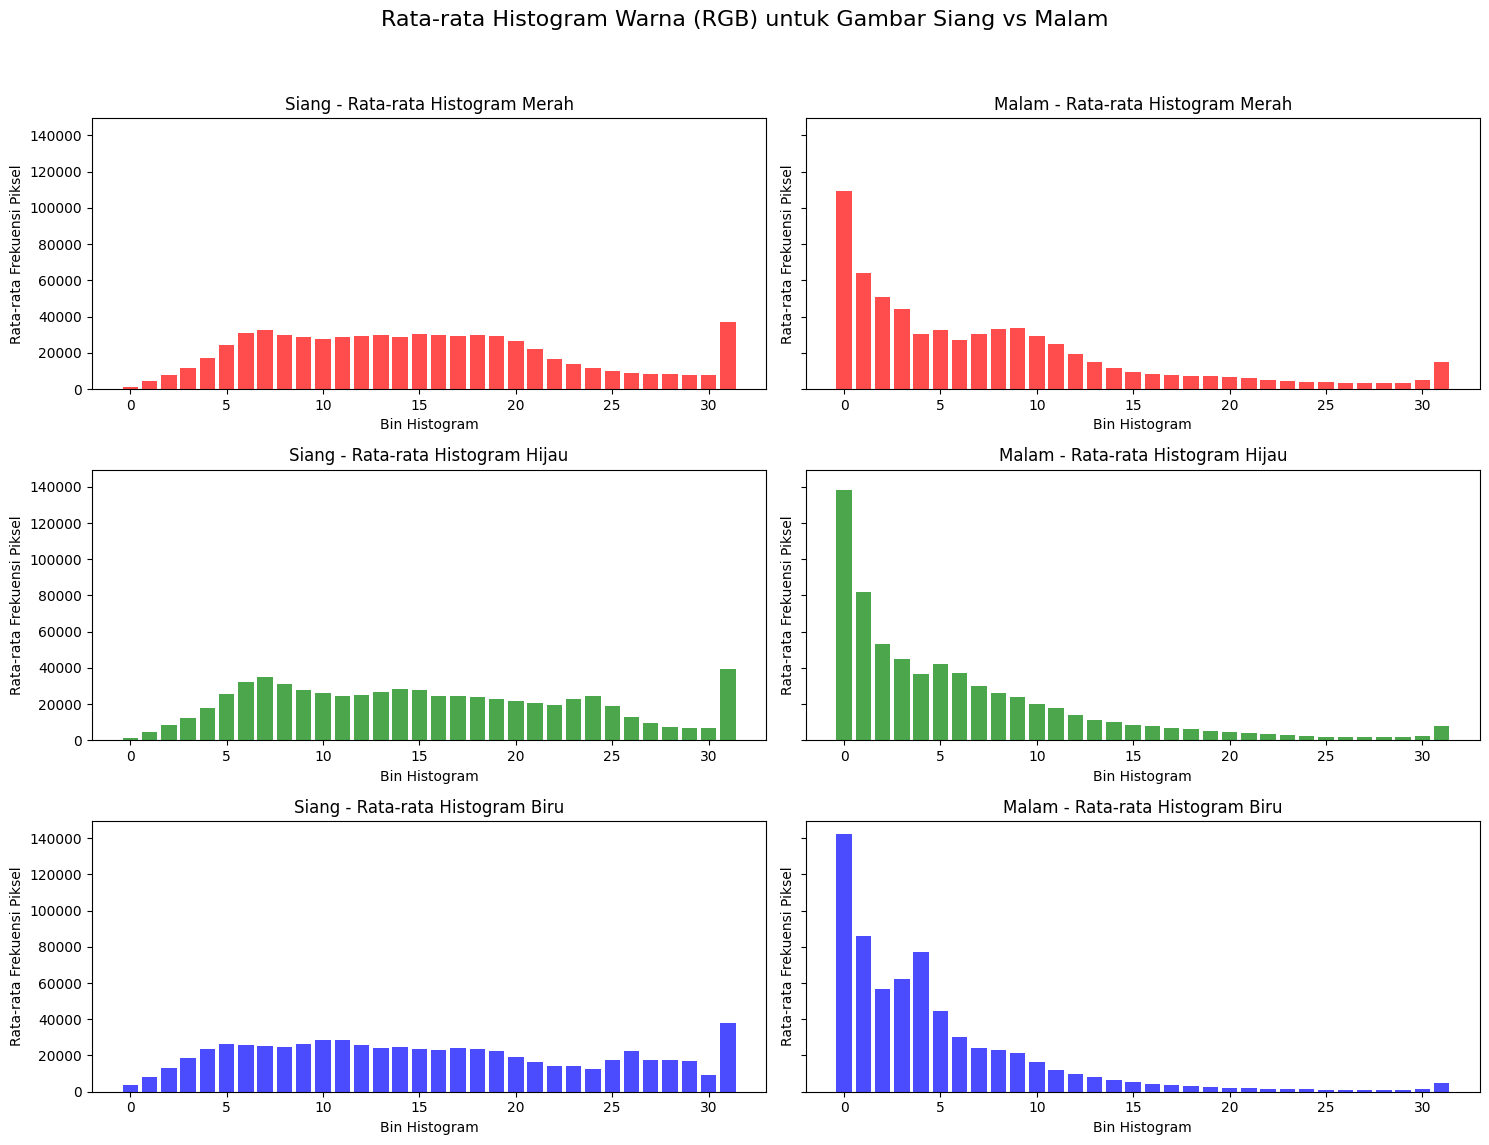

In [126]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_hist and y_hist are already prepared from previous steps

# Separate features by label
X_hist_day = X_hist[y_hist == 1] # Assuming 1 is 'day'
X_hist_night = X_hist[y_hist == 0] # Assuming 0 is 'night'

# Calculate average histograms for each class
# The histograms were concatenated as R, G, B channels, each with 32 bins
# So, the first 32 features are R, next 32 are G, last 32 are B

def get_avg_hist_channels(hist_features, bins=32):
    avg_hist = np.mean(hist_features, axis=0)
    avg_hist_r = avg_hist[0:bins]
    avg_hist_g = avg_hist[bins:2*bins]
    avg_hist_b = avg_hist[2*bins:3*bins]
    return avg_hist_r, avg_hist_g, avg_hist_b

avg_hist_r_day, avg_hist_g_day, avg_hist_b_day = get_avg_hist_channels(X_hist_day)
avg_hist_r_night, avg_hist_g_night, avg_hist_b_night = get_avg_hist_channels(X_hist_night)

bins_range = np.arange(32) # For X-axis of histogram bins

# Plotting the average histograms
fig, axes = plt.subplots(3, 2, figsize=(15, 12), sharey=True)
fig.suptitle('Rata-rata Histogram Warna (RGB) untuk Gambar Siang vs Malam', fontsize=16)

# Red Channel
axes[0, 0].bar(bins_range, avg_hist_r_day, color='red', alpha=0.7)
axes[0, 0].set_title('Siang - Rata-rata Histogram Merah')
axes[0, 1].bar(bins_range, avg_hist_r_night, color='red', alpha=0.7)
axes[0, 1].set_title('Malam - Rata-rata Histogram Merah')

# Green Channel
axes[1, 0].bar(bins_range, avg_hist_g_day, color='green', alpha=0.7)
axes[1, 0].set_title('Siang - Rata-rata Histogram Hijau')
axes[1, 1].bar(bins_range, avg_hist_g_night, color='green', alpha=0.7)
axes[1, 1].set_title('Malam - Rata-rata Histogram Hijau')

# Blue Channel
axes[2, 0].bar(bins_range, avg_hist_b_day, color='blue', alpha=0.7)
axes[2, 0].set_title('Siang - Rata-rata Histogram Biru')
axes[2, 1].bar(bins_range, avg_hist_b_night, color='blue', alpha=0.7)
axes[2, 1].set_title('Malam - Rata-rata Histogram Biru')

for ax in axes.flat:
    ax.set_xlabel('Bin Histogram')
    ax.set_ylabel('Rata-rata Frekuensi Piksel')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Dari visualisasi histogram di atas dapat terlihat bagaimana distribusi intensitas warna (merah, hijau, biru) berbeda antara gambar 'siang' dan 'malam'.

*   **Gambar Siang (Day Images):** Cenderung memiliki distribusi piksel yang lebih merata atau lebih tinggi pada bin intensitas yang lebih terang (bin yang lebih tinggi), menunjukkan gambar yang lebih cerah secara keseluruhan.
*   **Gambar Malam (Night Images):** Cenderung memiliki distribusi piksel yang lebih tinggi pada bin intensitas yang lebih gelap (bin yang lebih rendah), menunjukkan gambar yang lebih gelap secara keseluruhan.

Perbedaan ini adalah dasar fitur histogram yang digunakan oleh model SVM untuk mencoba membedakan antara gambar siang dan malam.